# Predictions Analysis

## Load Drive

In [4]:
import sys

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Dataset Analysis

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

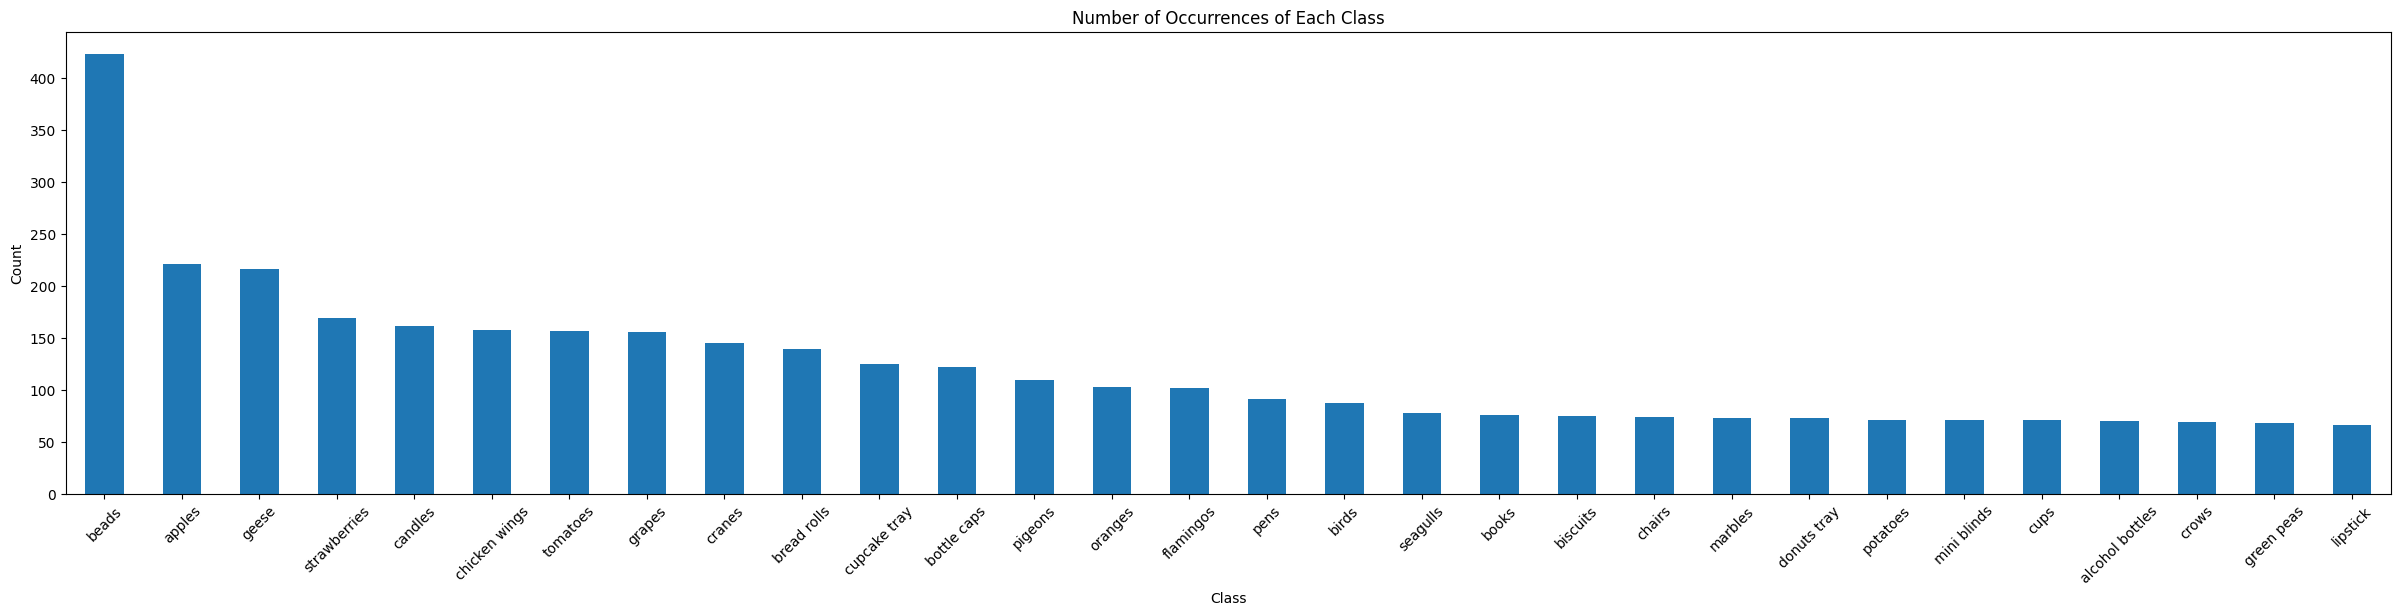

In [76]:
annotations_file = '/content/drive/MyDrive/CLASS_AGNOSTIC_COUNTER/data/FSC/FSC_147/ImageClasses_FSC147.txt'

# load .txt in dataframe
df = pd.read_csv(annotations_file, sep='\t', header=None, names=['File', 'Class'])

# evaluate class frequencies
class_counts = df['Class'].value_counts()

# plot the class counts for the 30 most present classes
plt.figure(figsize=(30, 6))
class_counts.head(30).plot(kind='bar')
plt.title('Number of Occurrences of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

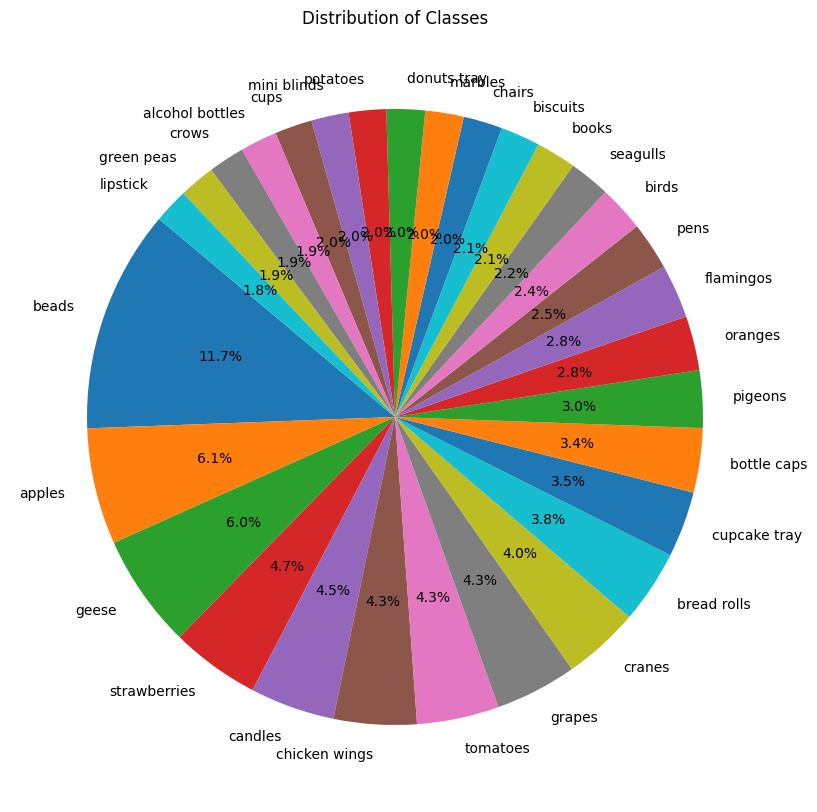

In [82]:
# class counts as a pie chart of 30 most frequent classes
plt.figure(figsize=(10, 10))
class_counts.head(30).plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.ylabel('')
plt.show()

## Bad Image Analysis

In [12]:
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [46]:
import re

filename = "jesus christ_36.75_gt_9.00.jpg"

# regex pattern to extract class name

pattern_class = r'^(\w+(?:\s+\w+)*)_?\d+\.\d+_gt_\d+\.\d+\.jpg$'
match = re.match(pattern_class, filename)

if match:
    class_name = match.group(1)
    print("Class name:", class_name)
else:
    print("Filename does not match the pattern.")

Class name: jesus christ_3


In [49]:
directory = '/content/drive/MyDrive/CLASS_AGNOSTIC_COUNTER/prediction-analysis/vanilla_clip_predictions/out/bad_pred/'

# regex pattern to extract numbers in filename
pattern_float = r'(\d+\.\d+)'
pattern_class = r'^bad_(.*?)_\d+\.\d+_gt_\d+\.\d+\.jpg$'

data = []

for filename in os.listdir(directory):
    # JPEG check
    if filename.endswith(".jpg"):
        matches = re.findall(pattern_float, filename)
        class_name = re.findall(pattern_class, filename)[0]
        float_values = [float(match) for match in matches]
        pred_cnt = float_values[0]
        gt_cnt = float_values[1]
        cnt_error = abs(pred_cnt - gt_cnt)
        data.append({'Filename': filename, 'Class name':class_name, 'Pred count': pred_cnt, 'GT count': gt_cnt, 'Count error': cnt_error, 'Count error %': (cnt_error/gt_cnt)*100})

df = pd.DataFrame(data)

# sort df by the 'Count error' column
df_sorted = df.sort_values(by='Count error %', ascending=[False])
df_sorted.head()

,Filename,Class name,Pred count,GT count,Count error,Count error %
266,bad_legos_1295.70_gt_13.00.jpg,legos,1295.70,13.0,1282.70,9866.923077
172,bad_donuts tray_271.33_gt_14.00.jpg,donuts tray,271.33,14.0,257.33,1838.071429
218,bad_donuts tray_142.68_gt_8.00.jpg,donuts tray,142.68,8.0,134.68,1683.500000
257,bad_sheep_350.00_gt_20.00.jpg,sheep,350.00,20.0,330.00,1650.000000
395,bad_skis_160.58_gt_12.00.jpg,skis,160.58,12.0,148.58,1238.166667


## Cluster images by class

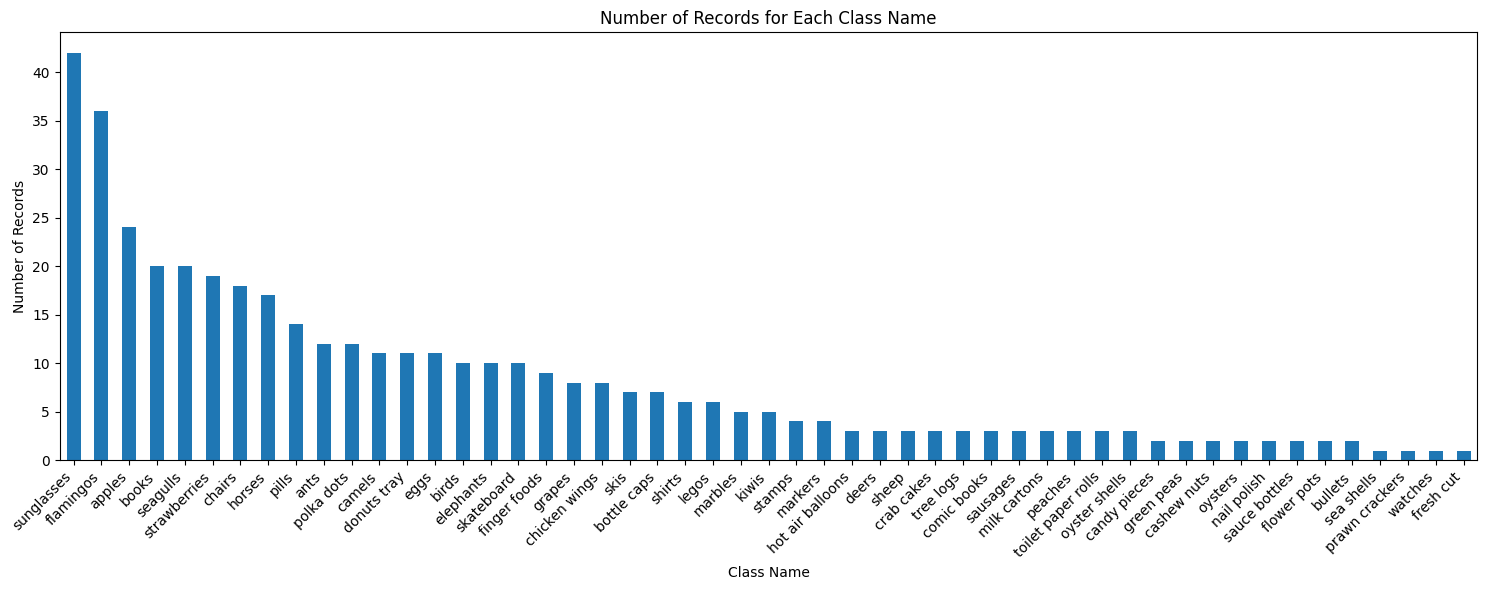

In [59]:
# group by 'Class name' and count occurrences
class_counts = df['Class name'].value_counts()

# Plotting
plt.figure(figsize=(15, 6))
class_counts.plot(kind='bar')
plt.title('Number of Records for Each Class Name')
plt.xlabel('Class Name')
plt.ylabel('Number of Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [63]:
# create a DataFrame with class names and frequencies
class_freq_table = pd.DataFrame({
    'Class Name': class_counts.index,
    'Frequency': class_counts.values
})

class_freq_table.head(10)

,Class Name,Frequency
0,sunglasses,42
1,flamingos,36
2,apples,24
3,books,20
4,seagulls,20
5,strawberries,19
6,chairs,18
7,horses,17
8,pills,14
9,ants,12


## Display worse images

In [58]:
worse_10 = df_sorted.head(10)

# Load and display top 10 images with subtitles
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.ravel()

for i, (index, row) in enumerate(worse_10.iterrows()):
    filename = row['Filename']
    image_path = os.path.join(directory, filename)
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].set_title(f'{row["Class name"]}')
    axes[i].set_xlabel(f'GT count: {row["GT count"]}, Pred count: {row["Pred count"]}')
    axes[i].get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.